In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#IMPORTING the Libraries and Reading the Data

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MiningProcess_Flotation_Plant_Database.csv', decimal=',', parse_dates=['date'],infer_datetime_format=True).drop_duplicates()
df['date'] = pd.to_datetime(df['date'])
df.head(10)

date  % Iron Feed  ...  % Iron Concentrate  % Silica Concentrate
0 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
1 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
2 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
3 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
4 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
5 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
6 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
7 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
8 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
9 2017-03-10 01:00:00         55.2  ...               66.91                  1.31

[10 rows x 24 columns]

In [ ]:
import matplotlib.style as style
# style.available

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

# Exploratory Data Analysis

In [ ]:
df.shape #To get the dimensions of data

(736282, 24)

In [ ]:
df.isna().sum() #No missing Data

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

**Hence there is no missing data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          736282 non-null  datetime64[ns]
 1   % Iron Feed                   736282 non-null  float64       
 2   % Silica Feed                 736282 non-null  float64       
 3   Starch Flow                   736282 non-null  float64       
 4   Amina Flow                    736282 non-null  float64       
 5   Ore Pulp Flow                 736282 non-null  float64       
 6   Ore Pulp pH                   736282 non-null  float64       
 7   Ore Pulp Density              736282 non-null  float64       
 8   Flotation Column 01 Air Flow  736282 non-null  float64       
 9   Flotation Column 02 Air Flow  736282 non-null  float64       
 10  Flotation Column 03 Air Flow  736282 non-null  float64       
 11  Flotation Col

**All Variable are numerical except the Date, No categorical data is present**

In [ ]:
df.describe()

% Iron Feed  % Silica Feed  ...  % Iron Concentrate  % Silica Concentrate
count  736282.000000  736282.000000  ...       736282.000000         736282.000000
mean       56.298307      14.648984  ...           65.049096              2.327270
std         5.160365       6.810741  ...            1.118721              1.125616
min        42.740000       1.310000  ...           62.050000              0.600000
25%        52.670000       8.940000  ...           64.370000              1.440000
50%        56.080000      13.850000  ...           65.210000              2.000000
75%        59.720000      19.600000  ...           65.860000              3.010000
max        65.780000      33.400000  ...           68.010000              5.530000

[8 rows x 23 columns]

**Heat Map Correlation** 

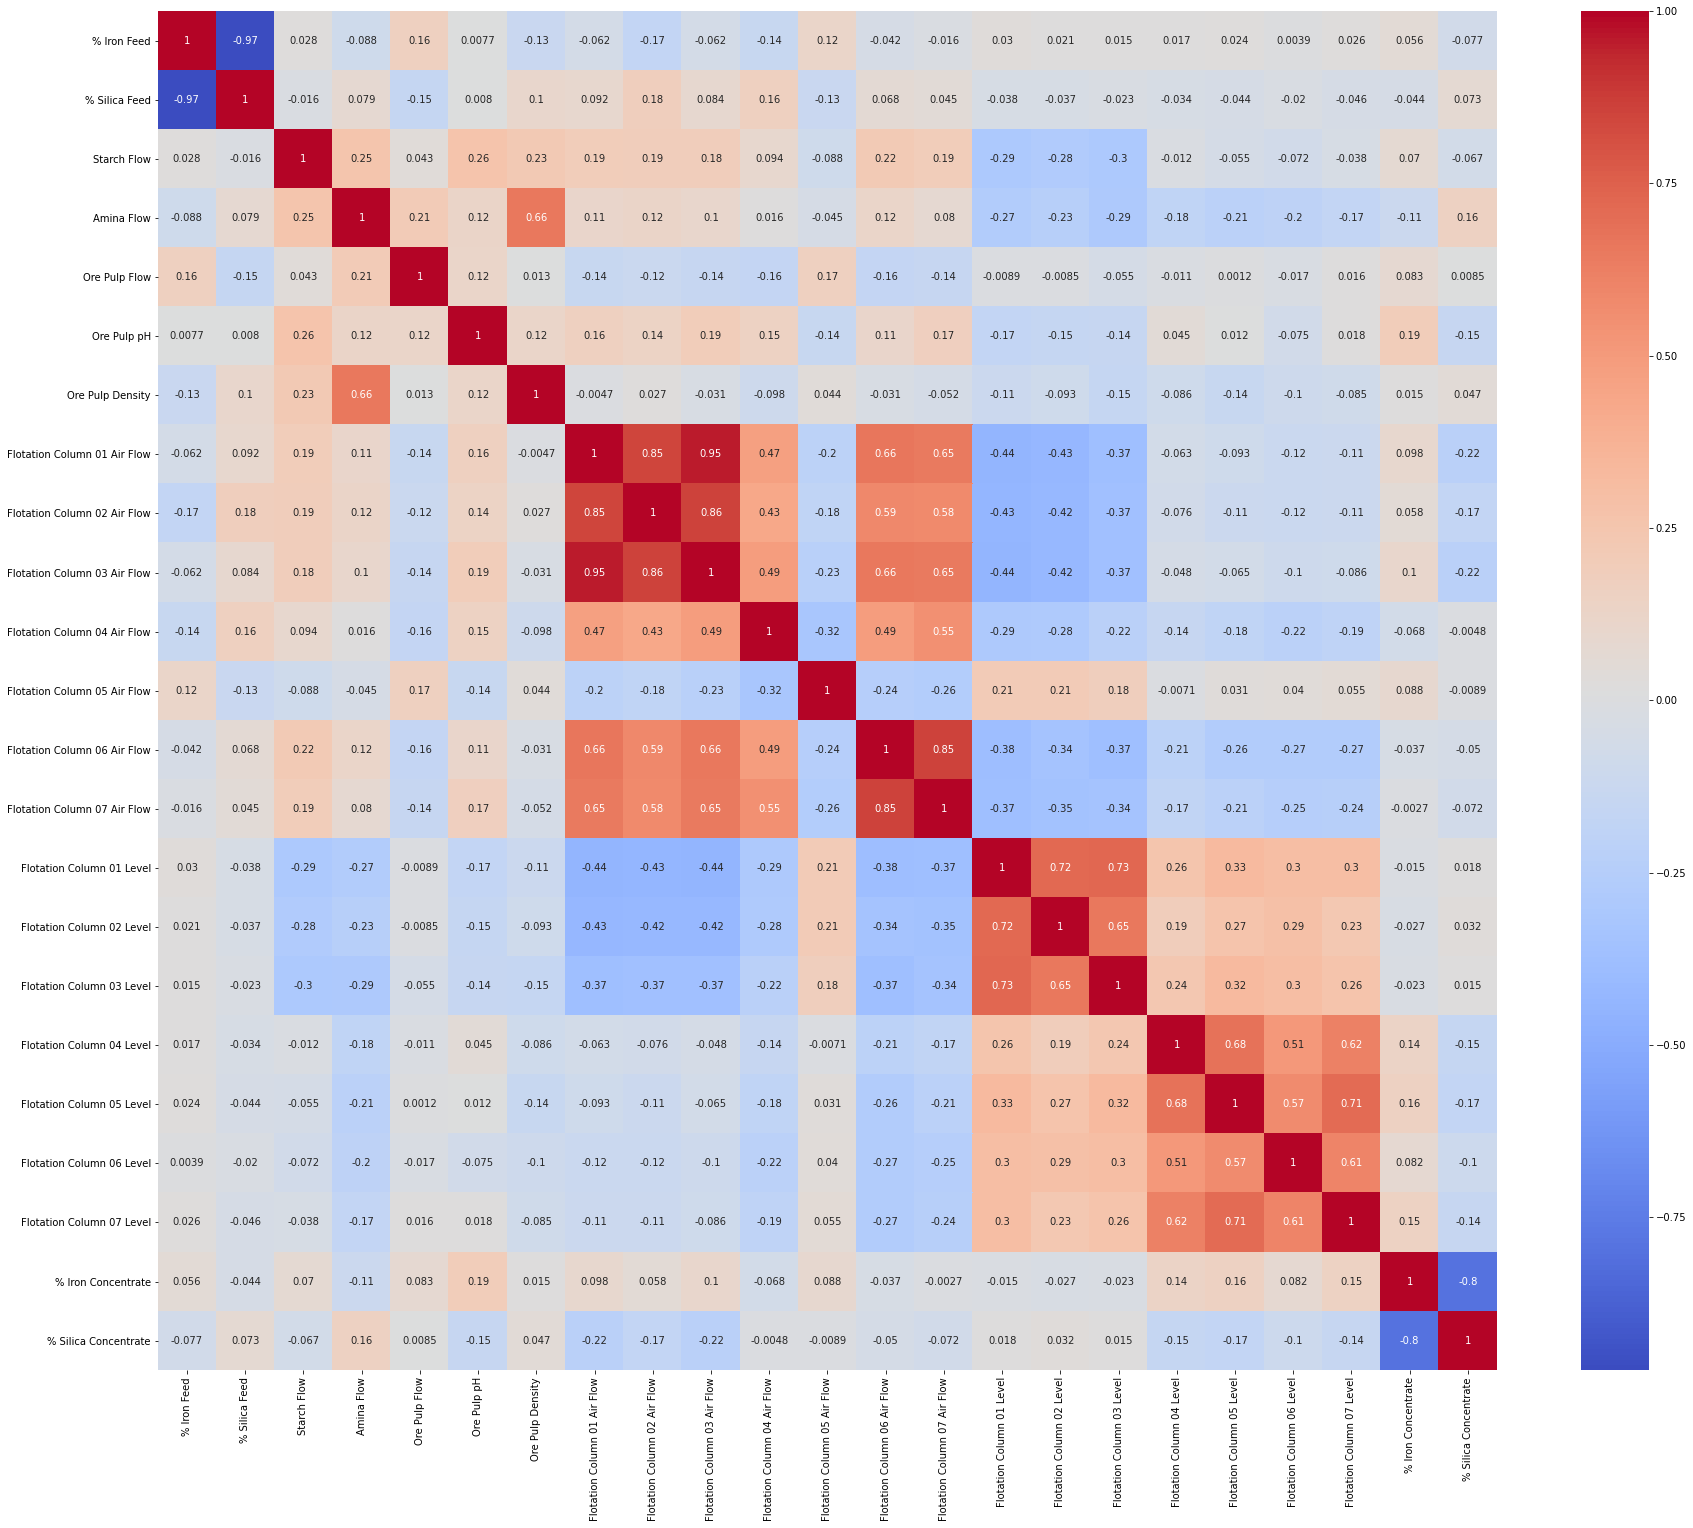

In [ ]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

In [ ]:
df = df.drop(['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 07 Air Flow'], axis=1)  
df.shape

(736282, 21)

In [ ]:
df.head(5)

date  % Iron Feed  ...  % Iron Concentrate  % Silica Concentrate
0 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
1 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
2 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
3 2017-03-10 01:00:00         55.2  ...               66.91                  1.31
4 2017-03-10 01:00:00         55.2  ...               66.91                  1.31

[5 rows x 21 columns]

**BOXPLOTS for Outlier Analysis**

In [ ]:
columns = list(df.columns)
columns = columns[1:]

In [ ]:
len(columns)

20

In [ ]:
style.use('seaborn-paper') #sets the size of the charts
style.use('ggplot')

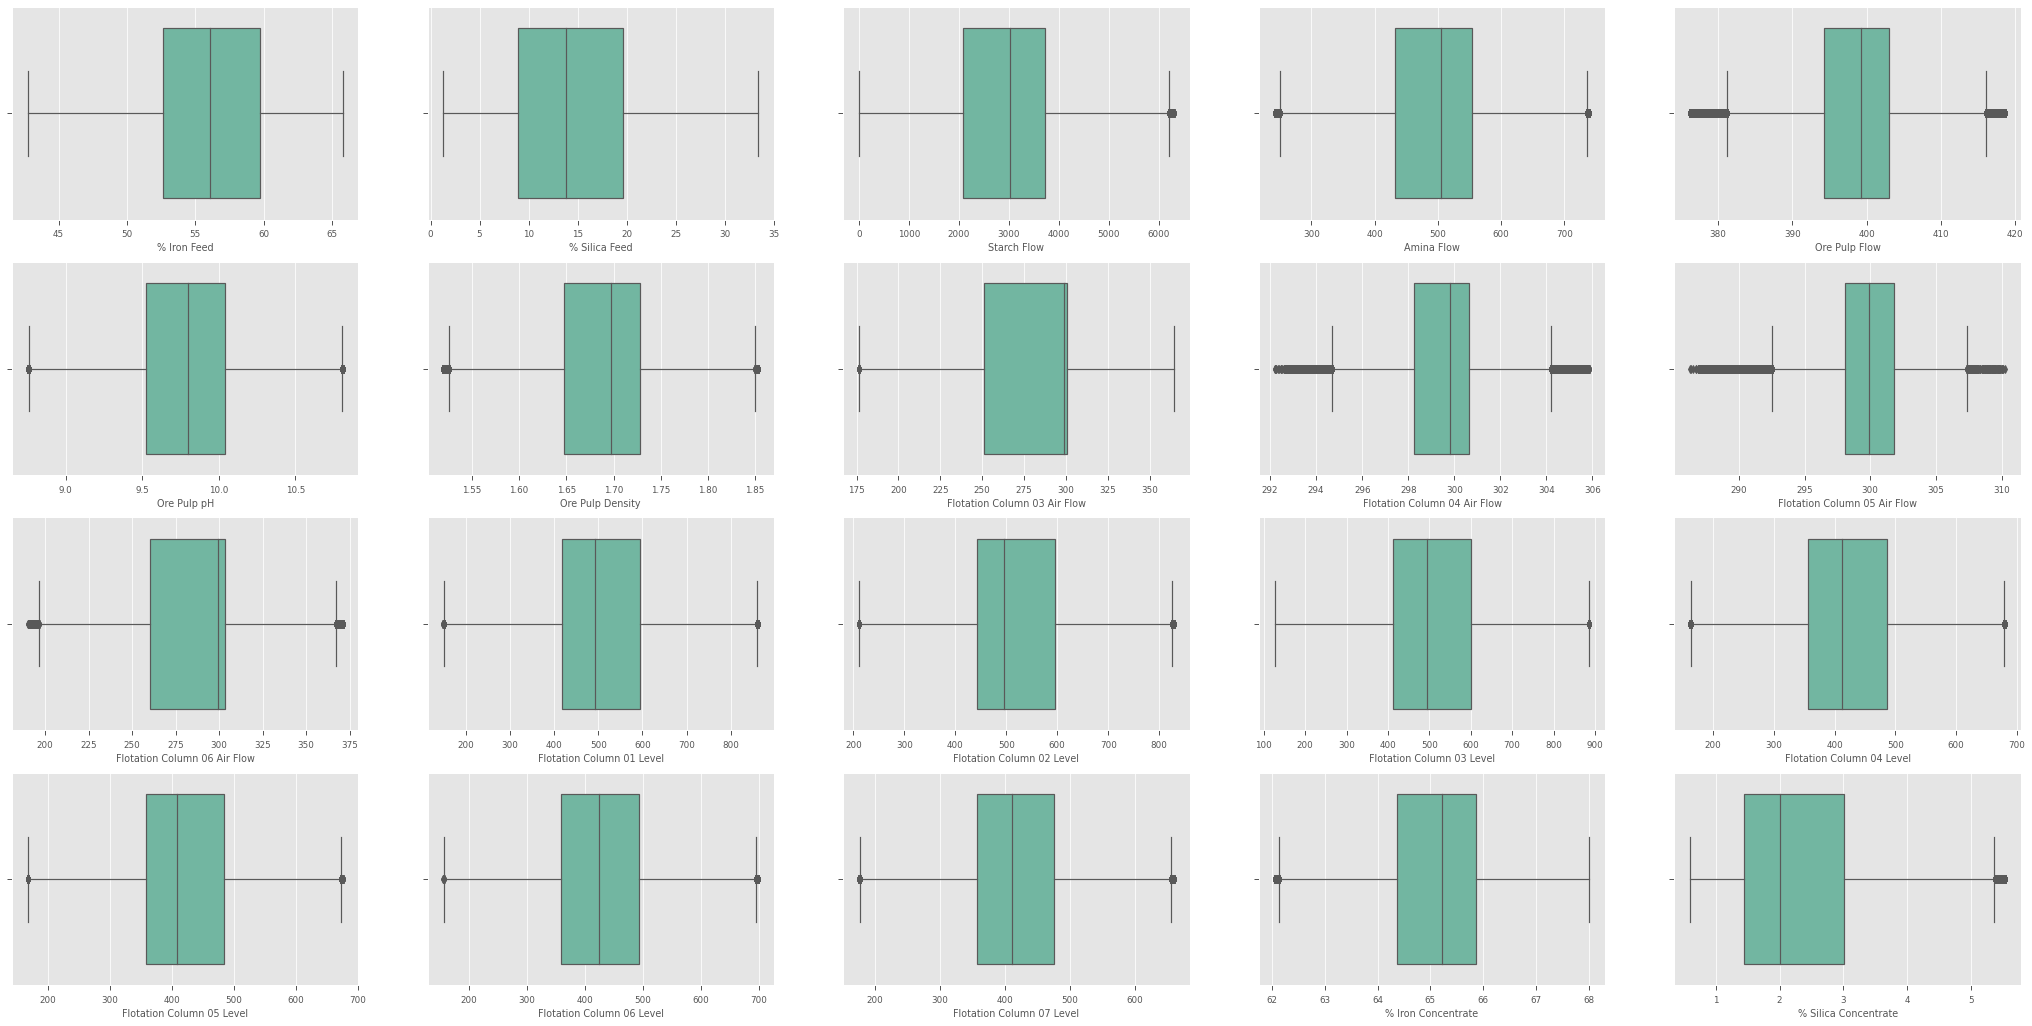

In [ ]:
a = 4  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter
sns.set_context('paper')
fig = plt.figure(figsize=(36,18))

for i in range(len(columns)):
    plt.subplot(a, b, c)
    #plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x=df[columns[i]],orient="h", palette="Set2", color='cyan')
    c = c + 1

plt.show()

In [ ]:
# for i in df.columns:
#     if(i=='date'):
#         continue
#     plt.figure(figsize=(16, 12))
#     sns.distplot(df[i])
#     plt.title(i)

**TimeSeries Plots of every attribute**

In [ ]:
# for i in df.columns:
#   plt.figure(figsize=(20,5),dpi=100)
#   sns.scatterplot(x=df['date'],y=df[i])
#   plt.title(i)


**RANDOM SAMPLING FOR DISTRIBUTION ANALYSIS**

In [ ]:
df1 = df.sample(frac=0.25, replace=True, random_state=1) #Random Sampling for distribution analysis

In [ ]:
df1.shape

(184070, 21)

**Distribution Plots of the randomly sampled Data**

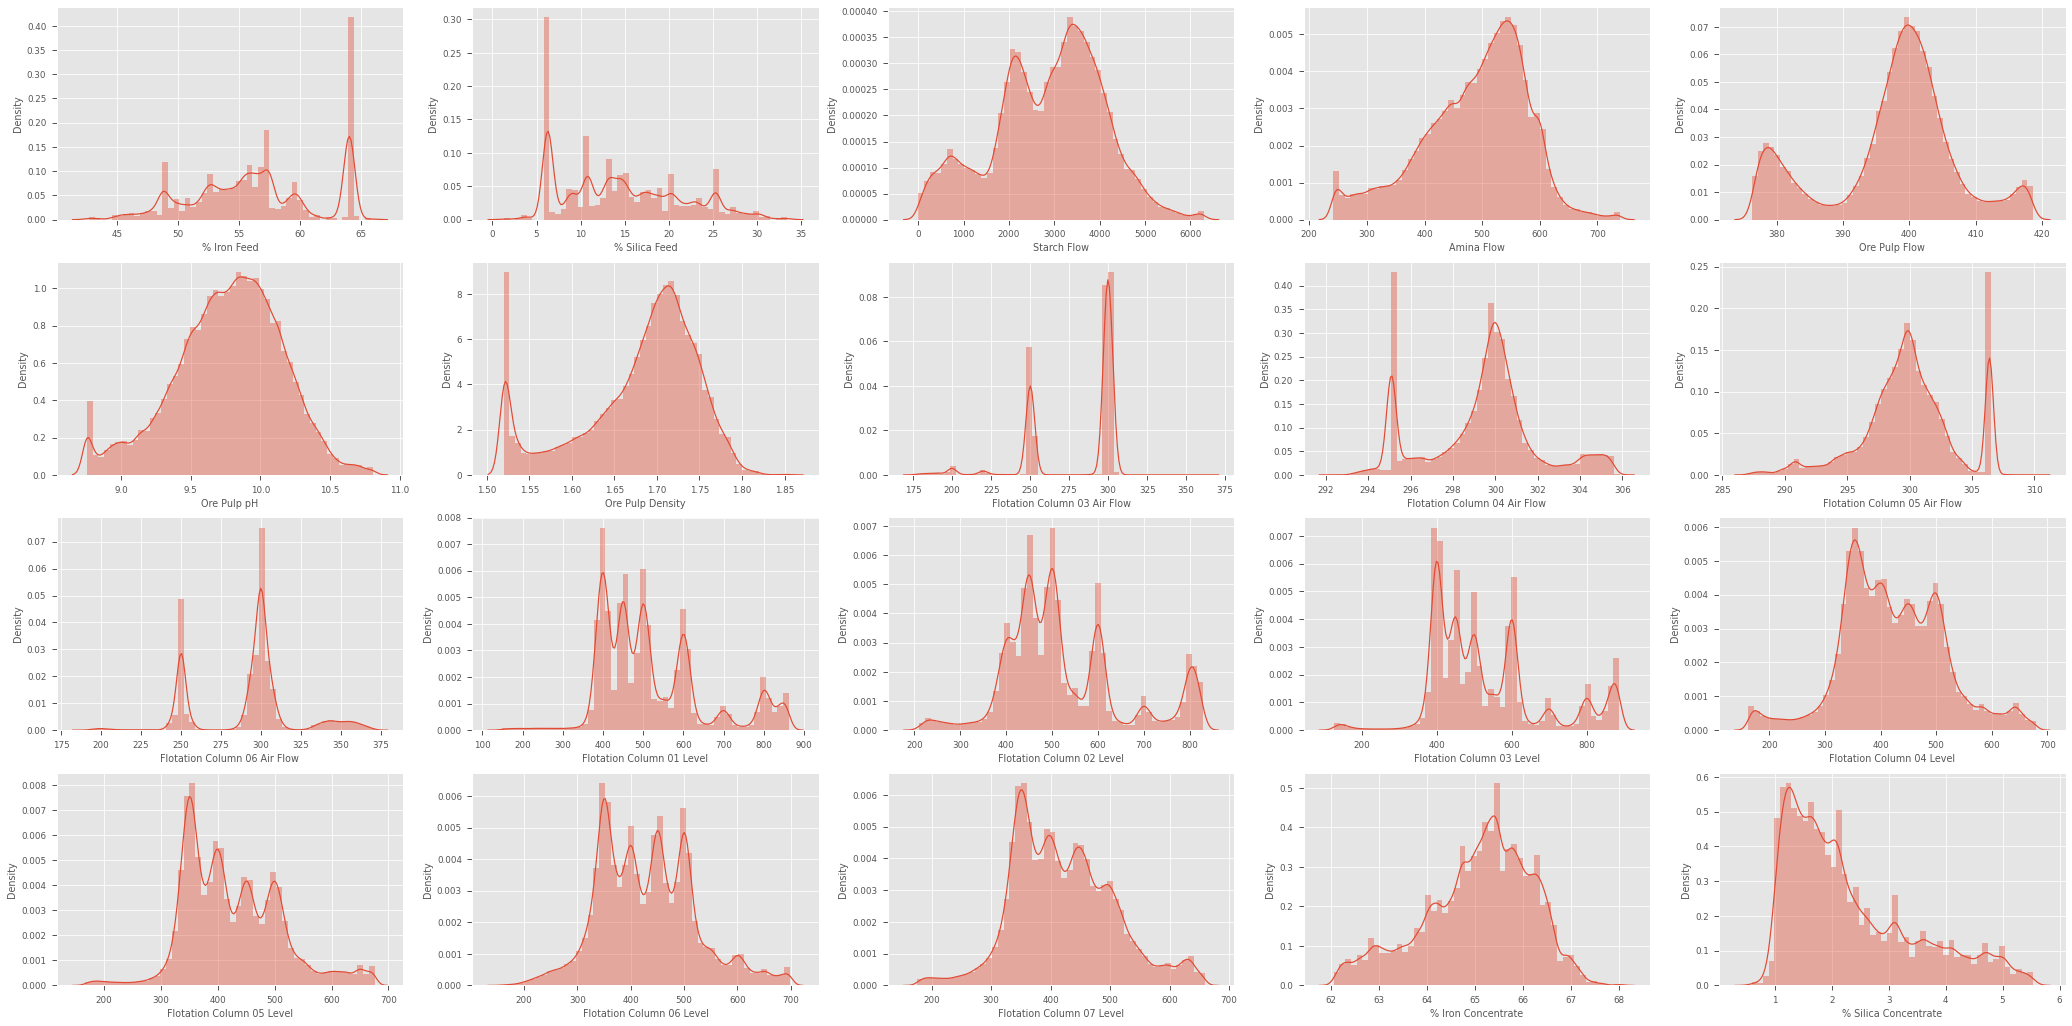

In [ ]:
a = 4  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter
sns.set_context('paper')
fig = plt.figure(figsize=(36,18))

for i in df1.columns:
    if(i=='date'):
      continue
    plt.subplot(a, b, c)
    #plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(x=df1[i])
    c = c + 1

plt.show()

**Scatter Plots of % Silica Concentrate(Target Variable) with every variable**

In [ ]:
# for i in df1.columns:
#     if(i=='date'):
#         continue
#     plt.figure(figsize=(20,5),dpi=100)
#     sns.scatterplot(x=df1[i],y=df1['% Silica Concentrate'])
#     plt.title(i)

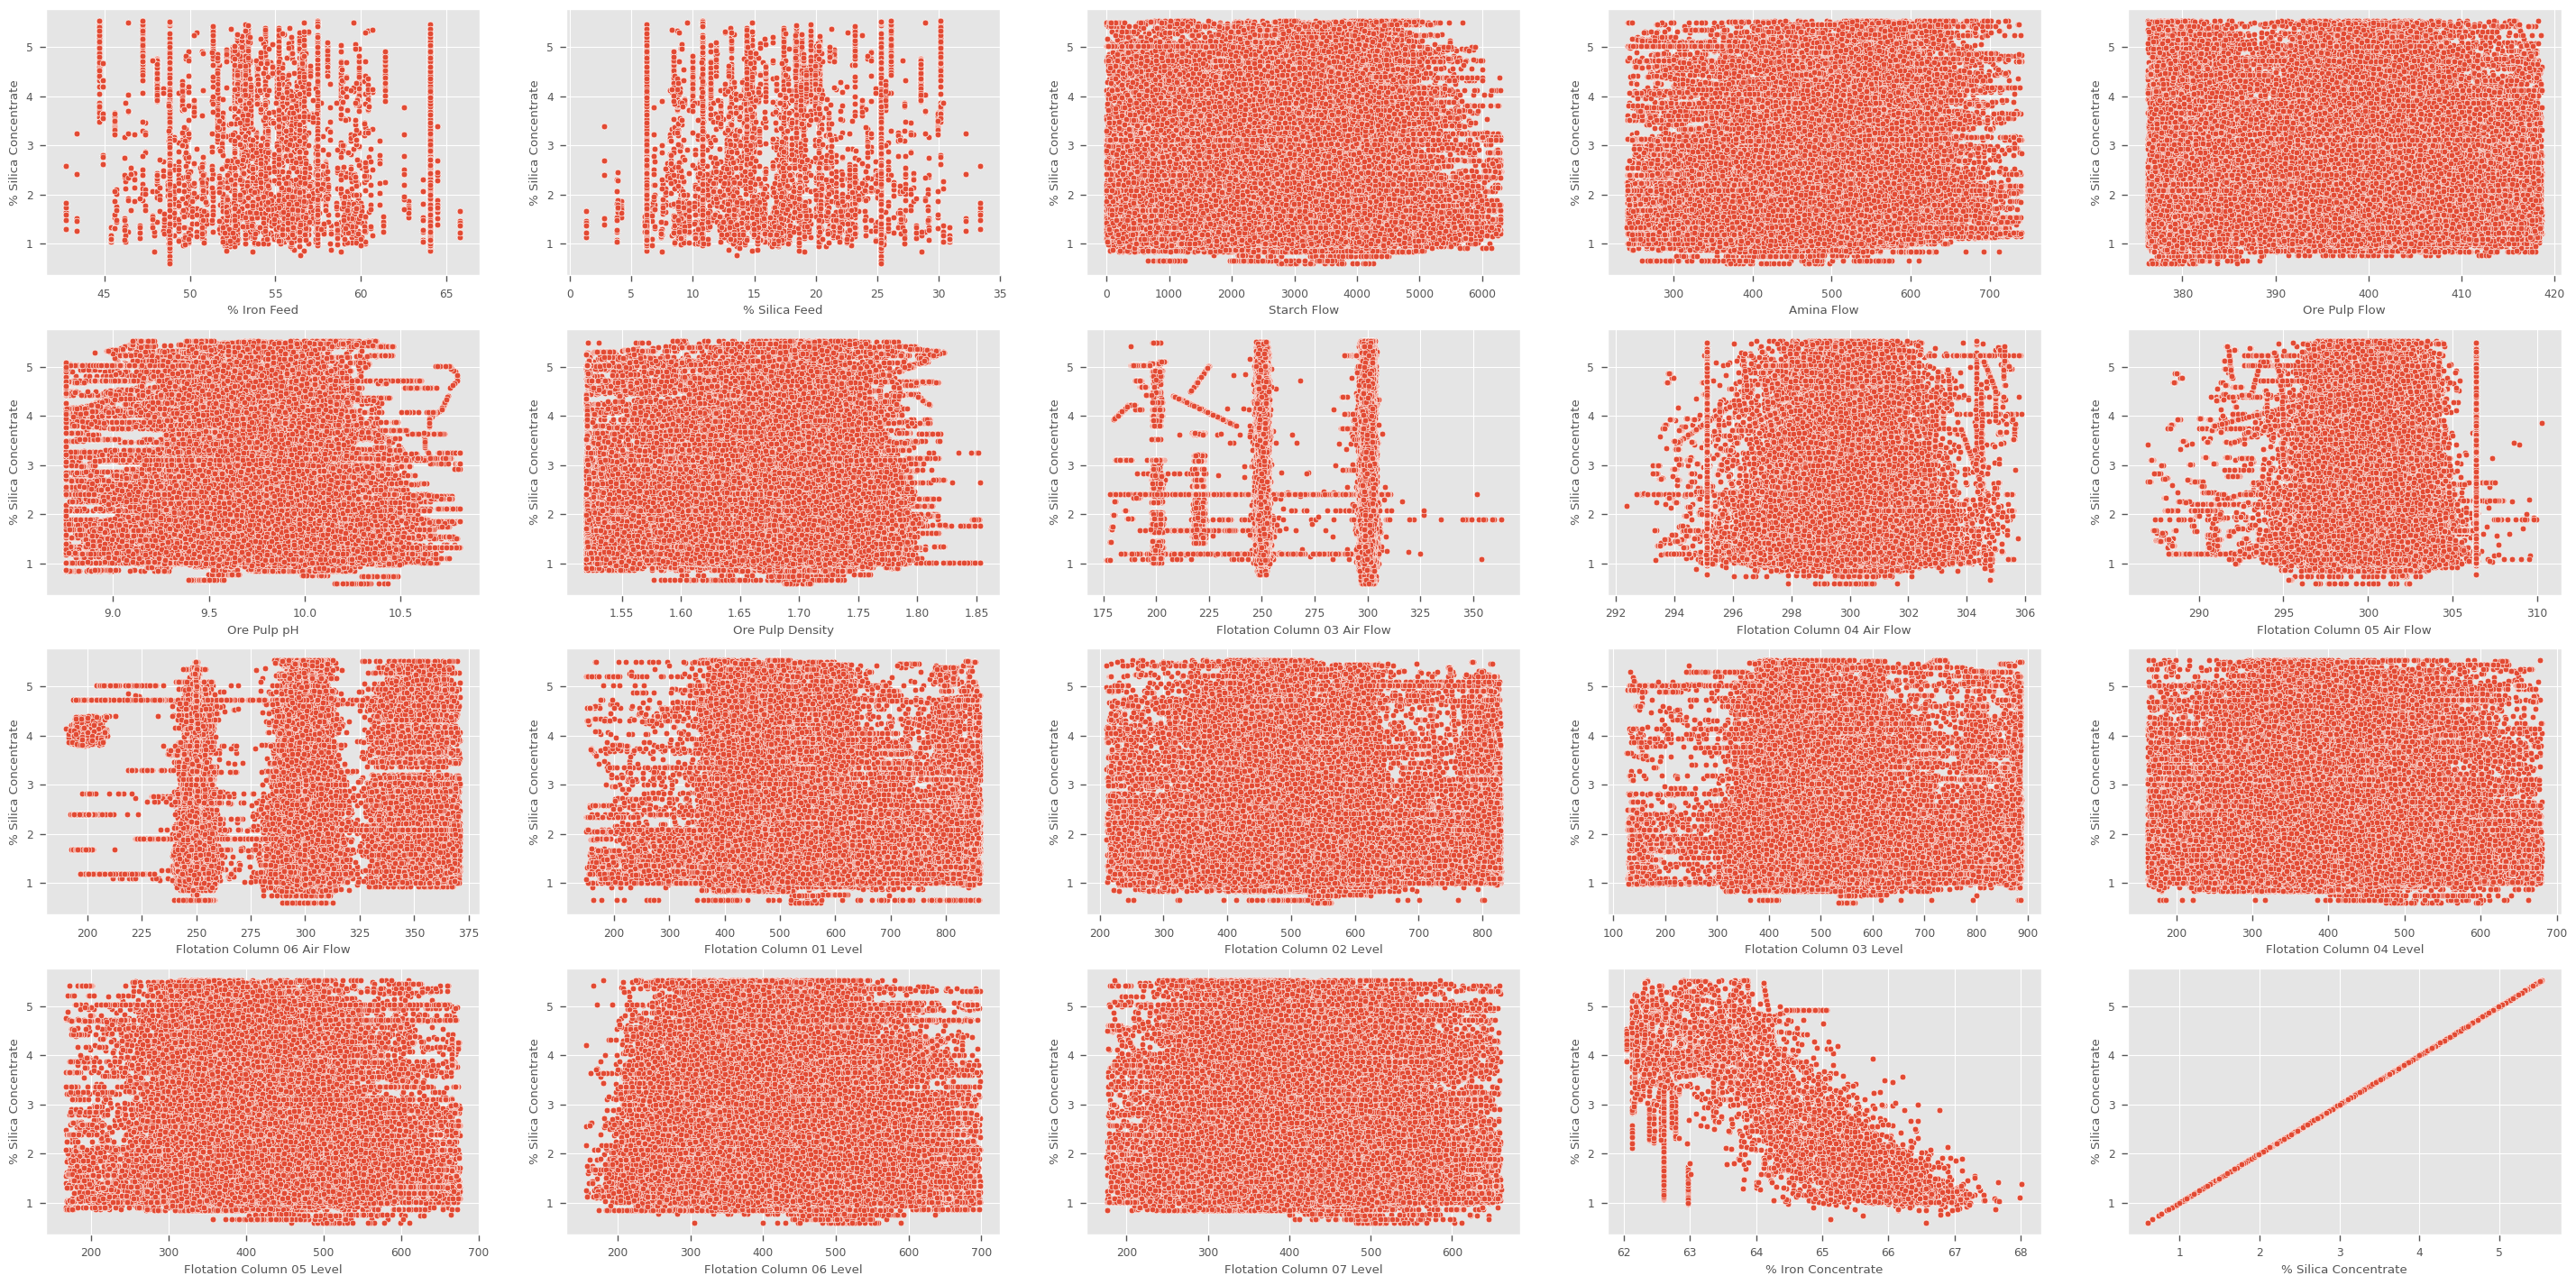

In [ ]:
a = 4  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter
sns.set_context('paper')
fig = plt.figure(figsize=(36,18),dpi=100)

for i in df1.columns:
    if(i=='date'):
      continue
    plt.subplot(a, b, c)
    #plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    #plt.xlabel(i)
    sns.scatterplot(x=df1[i],y=df1['% Silica Concentrate'])
    #plt.title(i)
    c = c + 1

plt.show()

## Pre-Processing

In [ ]:
df = df.drop(['date','% Iron Concentrate'], axis=1) #date is not relevant to the target that is the % Silica Concentrate
df.head(1)

% Iron Feed  % Silica Feed  ...  Flotation Column 07 Level  % Silica Concentrate
0         55.2          16.98  ...                    523.344                  1.31

[1 rows x 19 columns]

In [ ]:
df.shape

(736282, 19)

In [ ]:
df.skew()

% Iron Feed                    -0.001196
% Silica Feed                   0.440286
Starch Flow                    -0.243633
Amina Flow                     -0.568701
Ore Pulp Flow                  -0.468754
Ore Pulp pH                    -0.349086
Ore Pulp Density               -0.874697
Flotation Column 03 Air Flow   -1.239710
Flotation Column 04 Air Flow   -0.048726
Flotation Column 05 Air Flow   -0.296356
Flotation Column 06 Air Flow   -0.114911
Flotation Column 01 Level       0.984950
Flotation Column 02 Level       0.747556
Flotation Column 03 Level       0.821896
Flotation Column 04 Level       0.100042
Flotation Column 05 Level       0.577398
Flotation Column 06 Level       0.403601
Flotation Column 07 Level       0.350240
% Silica Concentrate            0.970062
dtype: float64

In [ ]:
skewness = df.skew()

Text(0.5, 1.0, 'Feature wise skewness')

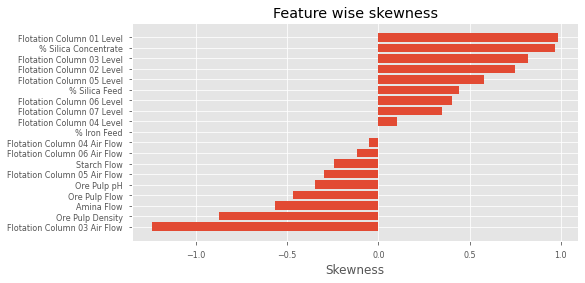

In [ ]:
plt.figure(figsize=(8, 4))
sorted_idx = skewness.argsort()
plt.barh(df.columns[sorted_idx], skewness[sorted_idx])
plt.xlabel("Skewness")
plt.title("Feature wise skewness")

In [ ]:
# remove outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#df2=df.drop(['date'],axis=1)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(534115, 19)

In [ ]:
df_out.skew() #skewness of data after removing outlier

% Iron Feed                    -0.094886
% Silica Feed                   0.547828
Starch Flow                    -0.296289
Amina Flow                     -0.462469
Ore Pulp Flow                  -0.391213
Ore Pulp pH                    -0.197215
Ore Pulp Density               -0.789658
Flotation Column 03 Air Flow   -1.052138
Flotation Column 04 Air Flow   -0.573574
Flotation Column 05 Air Flow    0.452347
Flotation Column 06 Air Flow   -0.372655
Flotation Column 01 Level       0.968969
Flotation Column 02 Level       0.770510
Flotation Column 03 Level       0.819270
Flotation Column 04 Level       0.001933
Flotation Column 05 Level       0.369708
Flotation Column 06 Level       0.191418
Flotation Column 07 Level       0.263144
% Silica Concentrate            0.969231
dtype: float64

**Min-Max Normalization**

In [ ]:
df_norm = df_out.copy()
for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
df_norm.head(5)

% Iron Feed  % Silica Feed  ...  Flotation Column 07 Level  % Silica Concentrate
0     0.540799       0.488314  ...                   0.723926              0.149017
1     0.540799       0.488314  ...                   0.671025              0.149017
2     0.540799       0.488314  ...                   0.588315              0.149017
3     0.540799       0.488314  ...                   0.523629              0.149017
4     0.540799       0.488314  ...                   0.519463              0.149017

[5 rows x 19 columns]

In [ ]:
# after removing outlier apply random sampling
df_new = df_norm.sample(frac=0.25, replace=True, random_state=1)
df_new.shape
# now data has only 133043 rows and we have already droped date columns

(133529, 19)

In [ ]:
# for i in df_new.columns:
#     plt.figure(figsize=(16, 12))
#     sns.distplot(df_new[i])
#     plt.title(i)

In [ ]:
#df1 = df.sample(frac=0.25, replace=True, random_state=1) #Random Sampling
Y = df_norm['% Silica Concentrate'] #Target Variable as per Kaggle
X = df_norm.drop(['% Silica Concentrate'], axis=1)
# X = X.drop(['date'], axis=1) #Date is useless

In [ ]:
X.head()

% Iron Feed  ...  Flotation Column 07 Level
0     0.540799  ...                   0.723926
1     0.540799  ...                   0.671025
2     0.540799  ...                   0.588315
3     0.540799  ...                   0.523629
4     0.540799  ...                   0.519463

[5 rows x 18 columns]

In [ ]:
Y.head()

0    0.149017
1    0.149017
2    0.149017
3    0.149017
4    0.149017
Name: % Silica Concentrate, dtype: float64

##Modelling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0,shuffle=True)

**Method for Linear Regression**

In [ ]:
def LinearReg(X_train, X_test, y_train, y_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  print("Training error=",r2_score(y_train,model.predict(X_train)))
  print("R2 score=",r2_score(y_test,model.predict(X_test)))
  print("RMSE=",mean_squared_error(y_test,model.predict(X_test), squared=False))
  importance = model.coef_
  # summarize feature importance
  for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
  # plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()


**Method for XGBoost Regression**



In [ ]:
def XGBreg(X_train, X_test, y_train, y_test):
  model = XGBRegressor()
  model.fit(X_train, y_train)
  print("Training error=",r2_score(y_train,model.predict(X_train)))
  print("R2 score=",r2_score(y_test,model.predict(X_test)))
  print("RMSE=",mean_squared_error(y_test,model.predict(X_test), squared=False))
  importance = model.feature_importances_
  # summarize feature importance
  for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
  # plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()

**Method for Random Forest Regression**

In [ ]:
def RandomForestReg(X_train, X_test, y_train, y_test, num):
  model = RandomForestRegressor(n_estimators = num, random_state = 0)
  model.fit(X_train, y_train)
  print("Training error=",r2_score(y_train,model.predict(X_train)))
  print("R2 score=",r2_score(y_test,model.predict(X_test)))
  print("RMSE=",mean_squared_error(y_test,model.predict(X_test), squared=False))
  importance = model.feature_importances_
  # summarize feature importance
  for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
  # plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()

**Method for AdaBoost Regression**

In [ ]:
def AdaBoostReg(X_train, X_test, y_train, y_test,num):
  from sklearn.ensemble import AdaBoostRegressor
  from sklearn.datasets import make_regression
  from sklearn.metrics import r2_score
  model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=num)
  # model = AdaBoostRegressor()
  model.fit(X_train, y_train)
  print("Training error=",r2_score(y_train,model.predict(X_train)))
  print("R2 score=",r2_score(y_test,model.predict(X_test)))
  print("RMSE=",mean_squared_error(y_test,model.predict(X_test), squared=False))
  importance = model.feature_importances_
  # summarize feature importance
  for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
  # plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()

Training error= 0.13375520756749315
R2 score= 0.13388110194886016
RMSE= 0.20914726556140528
Feature: % Iron Feed, Score: 0.01054
Feature: % Silica Feed, Score: 0.03611
Feature: Starch Flow, Score: -0.03112
Feature: Amina Flow, Score: 0.29457
Feature: Ore Pulp Flow, Score: -0.03032
Feature: Ore Pulp pH, Score: -0.06704
Feature: Ore Pulp Density, Score: -0.05483
Feature: Flotation Column 03 Air Flow, Score: -0.35570
Feature: Flotation Column 04 Air Flow, Score: 0.07872
Feature: Flotation Column 05 Air Flow, Score: 0.00748
Feature: Flotation Column 06 Air Flow, Score: 0.00174
Feature: Flotation Column 01 Level, Score: -0.09786
Feature: Flotation Column 02 Level, Score: 0.00583
Feature: Flotation Column 03 Level, Score: 0.05654
Feature: Flotation Column 04 Level, Score: -0.07154
Feature: Flotation Column 05 Level, Score: -0.13240
Feature: Flotation Column 06 Level, Score: -0.00278
Feature: Flotation Column 07 Level, Score: 0.01096


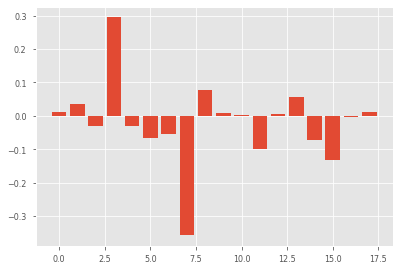

In [ ]:
LinearReg(X_train, X_test, y_train, y_test)

[14:18:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training error= 0.3357401335711462
R2 score= 0.33393278649560754
RMSE= 0.18340976811362983
Feature: % Iron Feed, Score: 0.05943
Feature: % Silica Feed, Score: 0.05238
Feature: Starch Flow, Score: 0.01507
Feature: Amina Flow, Score: 0.11876
Feature: Ore Pulp Flow, Score: 0.00929
Feature: Ore Pulp pH, Score: 0.03021
Feature: Ore Pulp Density, Score: 0.01959
Feature: Flotation Column 03 Air Flow, Score: 0.12617
Feature: Flotation Column 04 Air Flow, Score: 0.07262
Feature: Flotation Column 05 Air Flow, Score: 0.03007
Feature: Flotation Column 06 Air Flow, Score: 0.04565
Feature: Flotation Column 01 Level, Score: 0.03954
Feature: Flotation Column 02 Level, Score: 0.03515
Feature: Flotation Column 03 Level, Score: 0.04022
Feature: Flotation Column 04 Level, Score: 0.14160
Feature: Flotation Column 05 Level, Score: 0.12792
Feature: Flotation Column 06 Level, Score: 0

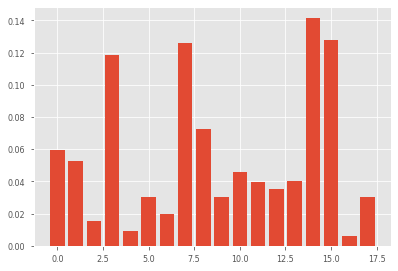

In [ ]:
XGBreg(X_train, X_test, y_train, y_test)

Training error= 0.9794415906383176
R2 score= 0.9174779517181467
RMSE= 0.06455775704054592
Feature: % Iron Feed, Score: 0.10911
Feature: % Silica Feed, Score: 0.13732
Feature: Starch Flow, Score: 0.05078
Feature: Amina Flow, Score: 0.09806
Feature: Ore Pulp Flow, Score: 0.01176
Feature: Ore Pulp pH, Score: 0.11940
Feature: Ore Pulp Density, Score: 0.08061
Feature: Flotation Column 03 Air Flow, Score: 0.07252
Feature: Flotation Column 04 Air Flow, Score: 0.04603
Feature: Flotation Column 05 Air Flow, Score: 0.03481
Feature: Flotation Column 06 Air Flow, Score: 0.02535
Feature: Flotation Column 01 Level, Score: 0.04293
Feature: Flotation Column 02 Level, Score: 0.03428
Feature: Flotation Column 03 Level, Score: 0.05933
Feature: Flotation Column 04 Level, Score: 0.01514
Feature: Flotation Column 05 Level, Score: 0.02970
Feature: Flotation Column 06 Level, Score: 0.02218
Feature: Flotation Column 07 Level, Score: 0.01069


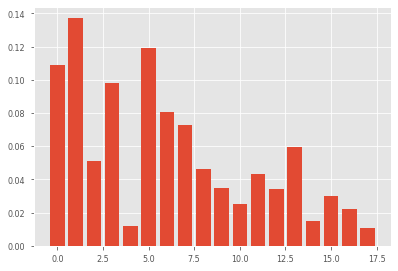

In [ ]:
RandomForestReg(X_train, X_test, y_train, y_test,5)

Training error= 0.9997413914328829
R2 score= 0.9282784016116558
RMSE= 0.06018502058385482
Feature: % Iron Feed, Score: 0.09602
Feature: % Silica Feed, Score: 0.10134
Feature: Starch Flow, Score: 0.06157
Feature: Amina Flow, Score: 0.10348
Feature: Ore Pulp Flow, Score: 0.01775
Feature: Ore Pulp pH, Score: 0.12586
Feature: Ore Pulp Density, Score: 0.08541
Feature: Flotation Column 03 Air Flow, Score: 0.05826
Feature: Flotation Column 04 Air Flow, Score: 0.03657
Feature: Flotation Column 05 Air Flow, Score: 0.03261
Feature: Flotation Column 06 Air Flow, Score: 0.02737
Feature: Flotation Column 01 Level, Score: 0.04756
Feature: Flotation Column 02 Level, Score: 0.04051
Feature: Flotation Column 03 Level, Score: 0.06373
Feature: Flotation Column 04 Level, Score: 0.02126
Feature: Flotation Column 05 Level, Score: 0.03722
Feature: Flotation Column 06 Level, Score: 0.02593
Feature: Flotation Column 07 Level, Score: 0.01756


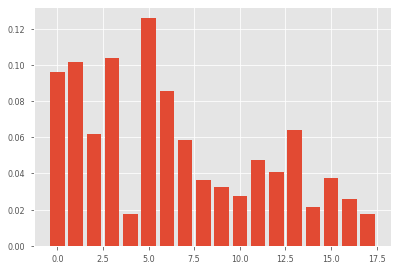

In [ ]:
AdaBoostReg(X_train, X_test, y_train, y_test,5)

## PCA




In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
principalComponents = pca.fit_transform(X)

In [ ]:
pca.n_components_

13

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = [str(i) for i in range(1,pca.n_components_+1)])

In [ ]:
pca_evr = pca.explained_variance_ratio_

In [ ]:
pca_evr

array([0.26564857, 0.15400139, 0.11968687, 0.08813349, 0.05929601,
       0.05161074, 0.05007251, 0.04554884, 0.03483479, 0.02866349,
       0.02045989, 0.01883039, 0.01645535])

Calculating the cumulative explained variance


In [ ]:
cum_explained_var = []
for i in range(0, len(pca_evr)):
    if i == 0:
        cum_explained_var.append(pca_evr[i])
    else:
        cum_explained_var.append(pca_evr[i] + 
                                 cum_explained_var[i-1])

Text(0, 0.5, 'Cumulative Explained Variance')

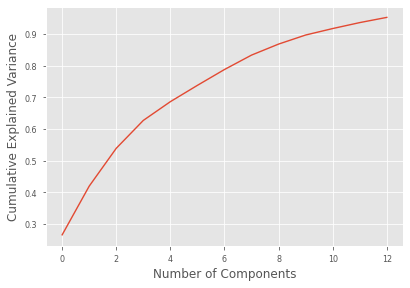

In [ ]:
plt.plot(cum_explained_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
principalDf.head(5)

1         2         3  ...        11        12        13
0  0.316478  0.230884 -0.028156  ... -0.005722 -0.015537  0.079131
1  0.304708  0.230014 -0.057288  ... -0.022241 -0.016796  0.077795
2  0.313788  0.228097 -0.106141  ... -0.006344  0.024907  0.072481
3  0.295842  0.227277 -0.155789  ... -0.031365  0.017623  0.076333
4  0.300245  0.222898 -0.155087  ... -0.036766  0.006929  0.048350

[5 rows x 13 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, Y, test_size=0.4, random_state=0,shuffle=True)

**Modelling on PCA components**

Training error= 0.128146397154127
R2 score= 0.1281588260712353
RMSE= 0.20983702542351867
Feature: 1, Score: 0.02853
Feature: 2, Score: 0.05514
Feature: 3, Score: -0.21479
Feature: 4, Score: -0.02477
Feature: 5, Score: -0.07255
Feature: 6, Score: -0.05719
Feature: 7, Score: 0.07635
Feature: 8, Score: 0.05857
Feature: 9, Score: 0.09494
Feature: 10, Score: -0.20917
Feature: 11, Score: 0.05762
Feature: 12, Score: -0.06616
Feature: 13, Score: 0.30830


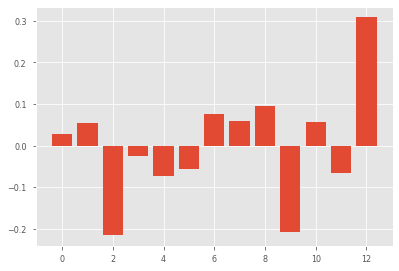

In [ ]:
LinearReg(X_train, X_test, y_train, y_test)

[14:28:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training error= 0.2400298524141622
R2 score= 0.23594817696837322
RMSE= 0.1964377005264489
Feature: 1, Score: 0.08902
Feature: 2, Score: 0.07084
Feature: 3, Score: 0.28061
Feature: 4, Score: 0.07132
Feature: 5, Score: 0.03586
Feature: 6, Score: 0.02460
Feature: 7, Score: 0.02719
Feature: 8, Score: 0.03461
Feature: 9, Score: 0.02045
Feature: 10, Score: 0.14821
Feature: 11, Score: 0.04839
Feature: 12, Score: 0.04267
Feature: 13, Score: 0.10622


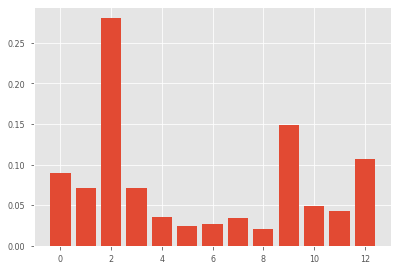

In [ ]:
XGBreg(X_train, X_test, y_train, y_test)

Training error= 0.9611764779307289
R2 score= 0.7379126957218329
RMSE= 0.11504994767608233
Feature: 1, Score: 0.09217
Feature: 2, Score: 0.15952
Feature: 3, Score: 0.10404
Feature: 4, Score: 0.07231
Feature: 5, Score: 0.07005
Feature: 6, Score: 0.04611
Feature: 7, Score: 0.04823
Feature: 8, Score: 0.04947
Feature: 9, Score: 0.08437
Feature: 10, Score: 0.07381
Feature: 11, Score: 0.04689
Feature: 12, Score: 0.06070
Feature: 13, Score: 0.09234


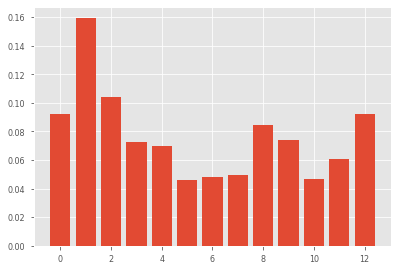

In [ ]:
RandomForestReg(X_train, X_test, y_train, y_test,50)

Training error= 0.9996886538539214
R2 score= 0.7849026157524246
RMSE= 0.1042271825317702
Feature: 1, Score: 0.08252
Feature: 2, Score: 0.14558
Feature: 3, Score: 0.08003
Feature: 4, Score: 0.07497
Feature: 5, Score: 0.07589
Feature: 6, Score: 0.06014
Feature: 7, Score: 0.05981
Feature: 8, Score: 0.05546
Feature: 9, Score: 0.09441
Feature: 10, Score: 0.06107
Feature: 11, Score: 0.05709
Feature: 12, Score: 0.06637
Feature: 13, Score: 0.08665


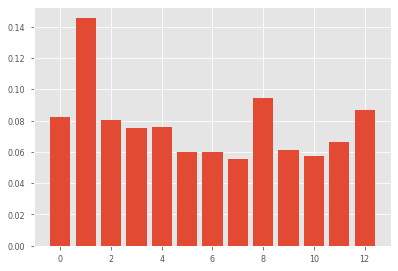

In [ ]:
AdaBoostReg(X_train, X_test, y_train, y_test,50)